# Machine Learning

## Library

In [35]:
library( rpart )    # decision tree
library( titanic )  # titanic dataset
library( caTools )  # Y ratio split

## Preprocessing

### Dealing with NA

#### Sample Data

In [38]:
x1 = c(1,2,3,4,NA,6,NA,8)
x2 = c('A','B','C',NA,'E','F',NA,NA)
my.df = data.frame(x1,x2)

[1] 1 2 3 4 6 8
attr(,"na.action")
[1] 5 7
attr(,"class")
[1] "omit"

#### Where are NAs (vector) ?
Use the logical vector from **is.na( )** for row selection

In [52]:
print( is.na(x1) )     # logical vector, NA elements will be TRUE
print( x1[!is.na(x1)])  # Use ! to reverse select for valid elements

[1] FALSE FALSE FALSE FALSE  TRUE FALSE  TRUE FALSE
[1] 1 2 3 4 6 8


#### Where are NAs (dataframe) ?
Notice that is.na( ) scan through every cells in dataframe and return a matrix logial vector.  
We **can't directly tell diretly** which rows contain NAs

In [54]:
print( is.na(my.df) )     # logical vector, NA elements will be TRUE

        x1    x2
[1,] FALSE FALSE
[2,] FALSE FALSE
[3,] FALSE FALSE
[4,] FALSE  TRUE
[5,]  TRUE FALSE
[6,] FALSE FALSE
[7,]  TRUE  TRUE
[8,] FALSE  TRUE


Using **complete.cases( )** we can detect the rows without NAs (complete) in a returned logical vector.  
TO detect rows with NAs, use **! not**

In [57]:
my.df[!complete.cases(my.df), ]m

,x1,x2
4,4,NA
5,NA,E
7,NA,NA
8,8,NA


#### Give Me Clean Data
Select Rows with **complete.cases**

In [64]:
my.df[complete.cases(my.df), ]

,x1,x2
1,1,A
2,2,B
3,3,C
6,6,F


A more elegant ways to filter clean data is **na.omit( )**

In [62]:
na.omit( my.df )

,x1,x2
1,1,A
2,2,B
3,3,C
6,6,F


### Splitting
#### Splitting by sample( ) 
This approach randomly picked row numbers without replacement.  
**It doesn't ensure the split ratio of of the imbalance labels**  
The result is a number vector with positions. Use **negate -** to reverse selection for test set

In [11]:
set.seed(1234)
n      = nrow(mtcars)   # total rows
ratio  = 0.7            # percentage for train split
split = sample( x = 1:n, size = ratio*n, replace = FALSE)
train = mtcars[  split, ]
test  = mtcars[ -split, ]

**Check Split Result by Row Numbers**

In [8]:
print( nrow(train) )
print( nrow(test)  )

[1] 22
[1] 10


#### Main Label (Y) Ratio
Split by sample.split( )
The result is a logical vector. Therefore, use **not !** to reverse selection for test set

In [28]:
split = sample.split(Y=titanic_train$Survived, SplitRatio = 0.7)  # randomly 0.7 set to TRUE, remaining FALSE
train = titanic_train[ split, ]
test  = titanic_train[!split, ]

In [33]:
print( nrow(train) )
print( nrow(test) )
prop.table( table(train$Survived))
prop.table( table(test$Survived))


[1] 623
[1] 268



        0         1 
0.6163724 0.3836276 


        0         1 
0.6156716 0.3843284 

### Scaling

#### Sample Data

In [59]:
x1 = 1:5
x2 = 11:15
num.df = data.frame(x1,x2)

In [60]:
print(num.df)

  x1 x2
1  1 11
2  2 12
3  3 13
4  4 14
5  5 15


#### minmax scaling
Use apply to loop through each column and return vector on each loop

In [67]:
apply( num.df, MARGIN=2,
      function(x) { x/(max(x)-min(x))}
)

x1,x2
0.25,2.75
0.50,3.00
0.75,3.25
1.00,3.50
1.25,3.75


#### Z-Score Scaling

In [61]:
scale( num.df )

x1,x2
-1.2649111,-1.2649111
-0.6324555,-0.6324555
0.0000000,0.0000000
0.6324555,0.6324555
1.2649111,1.2649111


## Clustering

### H Clustering

### Kmeans

## Regression

### Linear Regression

#### The Data

In [71]:
head(train)
n = nrow(mtcars)
spl = sample(1:n, 0.7*n, replace = FALSE)
train = mtcars[spl,]
test  = mtcars[-spl,]

,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
Datsun 710,22.8,4,108.0,93,3.85,2.320,18.61,1,1,4,1
Lotus Europa,30.4,4,95.1,113,3.77,1.513,16.90,1,1,5,2
Merc 240D,24.4,4,146.7,62,3.69,3.190,20.00,1,0,4,2
Hornet 4 Drive,21.4,6,258.0,110,3.08,3.215,19.44,1,0,3,1
Maserati Bora,15.0,8,301.0,335,3.54,3.570,14.60,0,1,5,8
Cadillac Fleetwood,10.4,8,472.0,205,2.93,5.250,17.98,0,0,3,4


#### Build Model
Example below build single variable linear ergression

In [73]:
fit1 = lm(formula = mpg ~ hp,        data = train) 
fit2 = lm(formula = mpg ~ hp + disp, data=train)
fit3 = lm(formula = mpg ~ .,         data=train)

#### Understand The Model

In [74]:
summary(fit3)


Call:
lm(formula = mpg ~ ., data = train)

Residuals:
    Min      1Q  Median      3Q     Max 
-2.6219 -0.9163 -0.2468  0.6527  3.6651 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)  
(Intercept) 12.424539  30.005369   0.414   0.6868  
cyl         -2.160032   1.186259  -1.821   0.0959 .
disp         0.026009   0.022881   1.137   0.2798  
hp           0.005407   0.025267   0.214   0.8345  
drat         0.823752   1.924582   0.428   0.6769  
wt          -5.957844   3.065393  -1.944   0.0780 .
qsec         1.733884   1.525066   1.137   0.2797  
vs          -3.860979   2.928385  -1.318   0.2141  
am          -1.446609   2.062329  -0.701   0.4976  
gear        -0.069946   1.646062  -0.042   0.9669  
carb         0.598199   0.934220   0.640   0.5351  
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 1.996 on 11 degrees of freedom
Multiple R-squared:  0.901,	Adjusted R-squared:  0.8109 
F-statistic: 10.01 on 10 and 11 DF,  p-valu

In [75]:
str(fit1)

List of 12
 $ coefficients : Named num [1:2] 26.2501 -0.0501
  ..- attr(*, "names")= chr [1:2] "(Intercept)" "hp"
 $ residuals    : Named num [1:22] 1.258 -2.0267 0.0733 1.7226 -5.0722 ...
  ..- attr(*, "names")= chr [1:22] "Merc 240D" "Merc 450SLC" "Merc 450SL" "Pontiac Firebird" ...
 $ effects      : Named num [1:22] -85.8986 16.025 0.0944 1.7124 -4.8314 ...
  ..- attr(*, "names")= chr [1:22] "(Intercept)" "hp" "" "" ...
 $ rank         : int 2
 $ fitted.values: Named num [1:22] 23.1 17.2 17.2 17.5 15.5 ...
  ..- attr(*, "names")= chr [1:22] "Merc 240D" "Merc 450SLC" "Merc 450SL" "Pontiac Firebird" ...
 $ assign       : int [1:2] 0 1
 $ qr           :List of 5
  ..$ qr   : num [1:22, 1:2] -4.69 0.213 0.213 0.213 0.213 ...
  .. ..- attr(*, "dimnames")=List of 2
  .. .. ..$ : chr [1:22] "Merc 240D" "Merc 450SLC" "Merc 450SL" "Pontiac Firebird" ...
  .. .. ..$ : chr [1:2] "(Intercept)" "hp"
  .. ..- attr(*, "assign")= int [1:2] 0 1
  ..$ qraux: num [1:2] 1.21 1.12
  ..$ pivot: int [1:2]

#### Visualize The Model

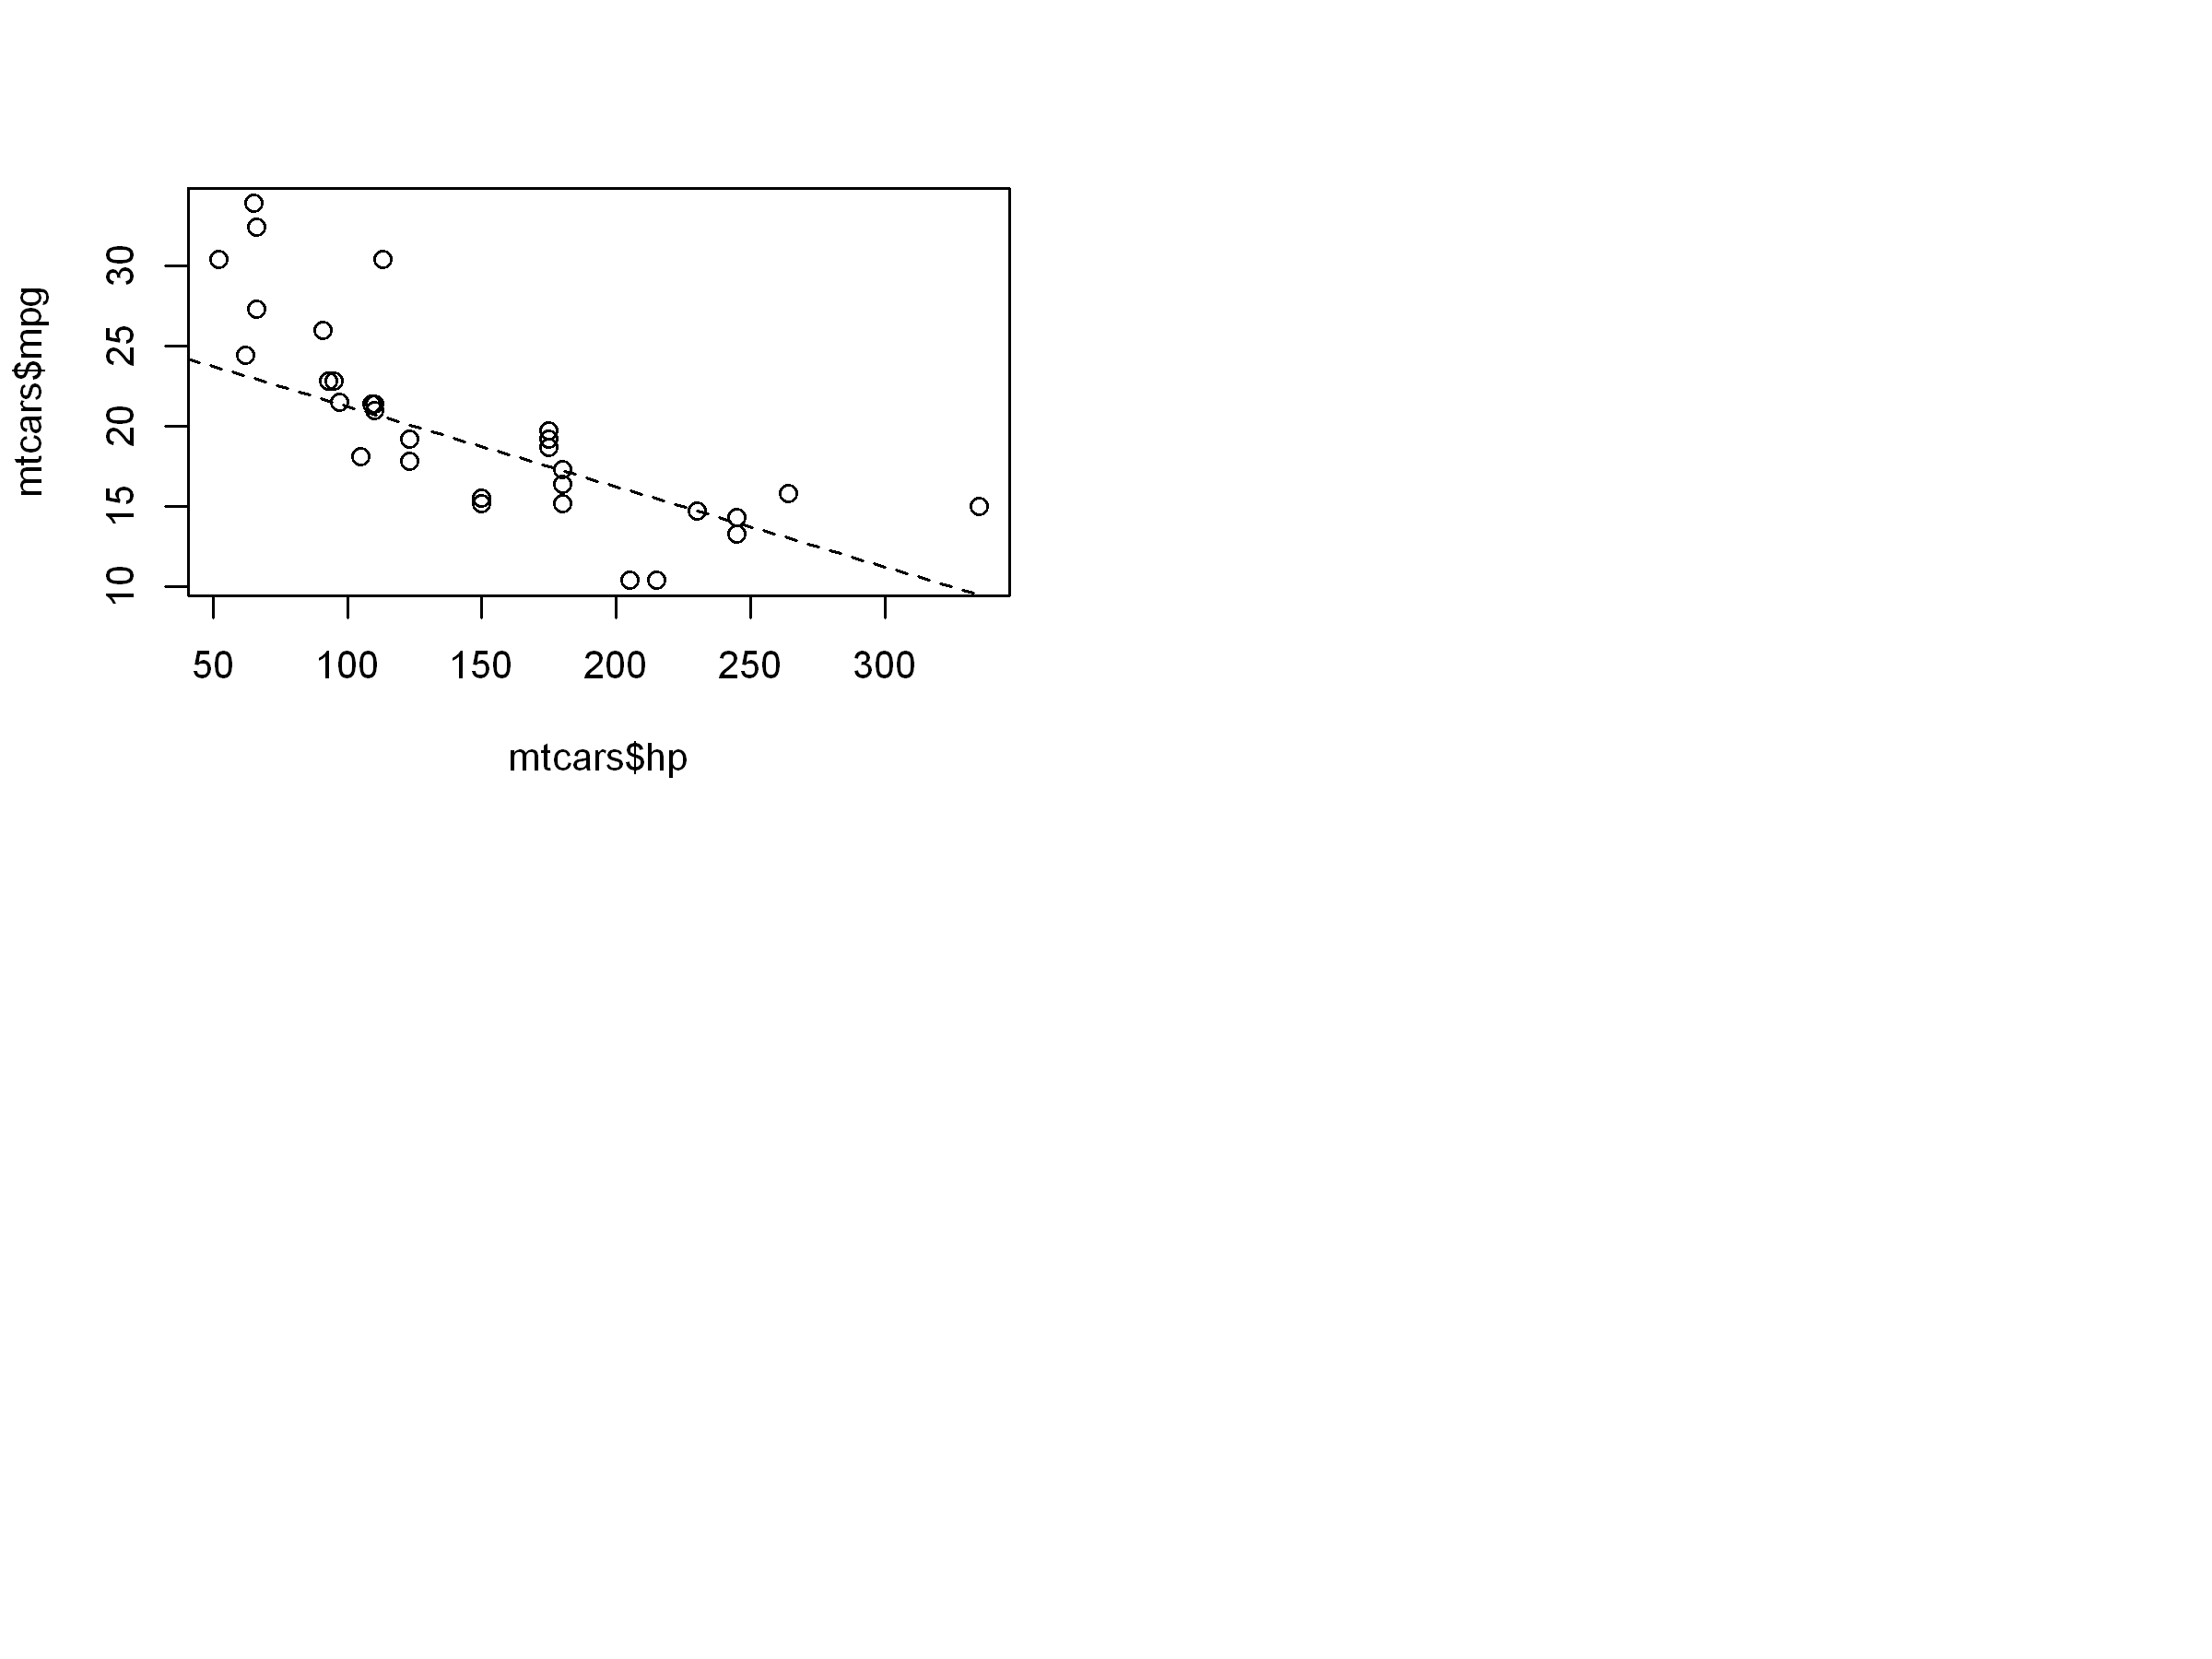

In [76]:
options(repr.plot.width =8 , repr.plot.height = 6, repr.plot.res = 300)
par(mfrow=c(2,2))

plot(mtcars$hp, mtcars$mpg)
abline(fit1, lty=2)

## Prediction

In [87]:
predict(fit3, newdata = test)

Hornet Sportabout        Duster 360          Merc 230          Merc 280 
         18.05070          16.85452          29.18356          17.20468 
       Merc 450SE          Fiat 128       Honda Civic    Toyota Corolla 
         13.32555          25.21135          28.19416          28.04379 
    Toyota Corona      Lotus Europa 
         27.01672          25.80187

### Decision Tree

#### Build Model

In [16]:
library(rpart)

In [17]:
fit = rpart( formula = mpg ~ hp + disp, data=mtcars)

#### Understand The Model

In [18]:
summary( fit )

Call:
rpart(formula = mpg ~ hp + disp, data = mtcars)
  n= 32 

         CP nsplit rel error    xerror      xstd
1 0.6130502      0 1.0000000 1.0848488 0.2556221
2 0.0100000      1 0.3869498 0.5690072 0.1030710

Variable importance
disp   hp 
  56   44 

Node number 1: 32 observations,    complexity param=0.6130502
  mean=20.09062, MSE=35.18897 
  left son=2 (18 obs) right son=3 (14 obs)
  Primary splits:
      disp < 163.8 to the right, improve=0.6130502, (0 missing)
      hp   < 118   to the right, improve=0.6010712, (0 missing)
  Surrogate splits:
      hp < 118   to the right, agree=0.906, adj=0.786, (0 split)

Node number 2: 18 observations
  mean=15.99444, MSE=7.977191 

Node number 3: 14 observations
  mean=25.35714, MSE=20.86673 



In [19]:
str( fit )

List of 14
 $ frame              :'data.frame':	3 obs. of  8 variables:
  ..$ var       : Factor w/ 2 levels "<leaf>","disp": 2 1 1
  ..$ n         : int [1:3] 32 18 14
  ..$ wt        : num [1:3] 32 18 14
  ..$ dev       : num [1:3] 1126 144 292
  ..$ yval      : num [1:3] 20.1 16 25.4
  ..$ complexity: num [1:3] 0.613 0.01 0.01
  ..$ ncompete  : int [1:3] 1 0 0
  ..$ nsurrogate: int [1:3] 1 0 0
 $ where              : Named int [1:32] 3 3 3 2 2 2 2 3 3 2 ...
  ..- attr(*, "names")= chr [1:32] "Mazda RX4" "Mazda RX4 Wag" "Datsun 710" "Hornet 4 Drive" ...
 $ call               : language rpart(formula = mpg ~ hp + disp, data = mtcars)
 $ terms              :Classes 'terms', 'formula'  language mpg ~ hp + disp
  .. ..- attr(*, "variables")= language list(mpg, hp, disp)
  .. ..- attr(*, "factors")= int [1:3, 1:2] 0 1 0 0 0 1
  .. .. ..- attr(*, "dimnames")=List of 2
  .. .. .. ..$ : chr [1:3] "mpg" "hp" "disp"
  .. .. .. ..$ : chr [1:2] "hp" "disp"
  .. ..- attr(*, "term.labels")= chr [1

#### Visualize

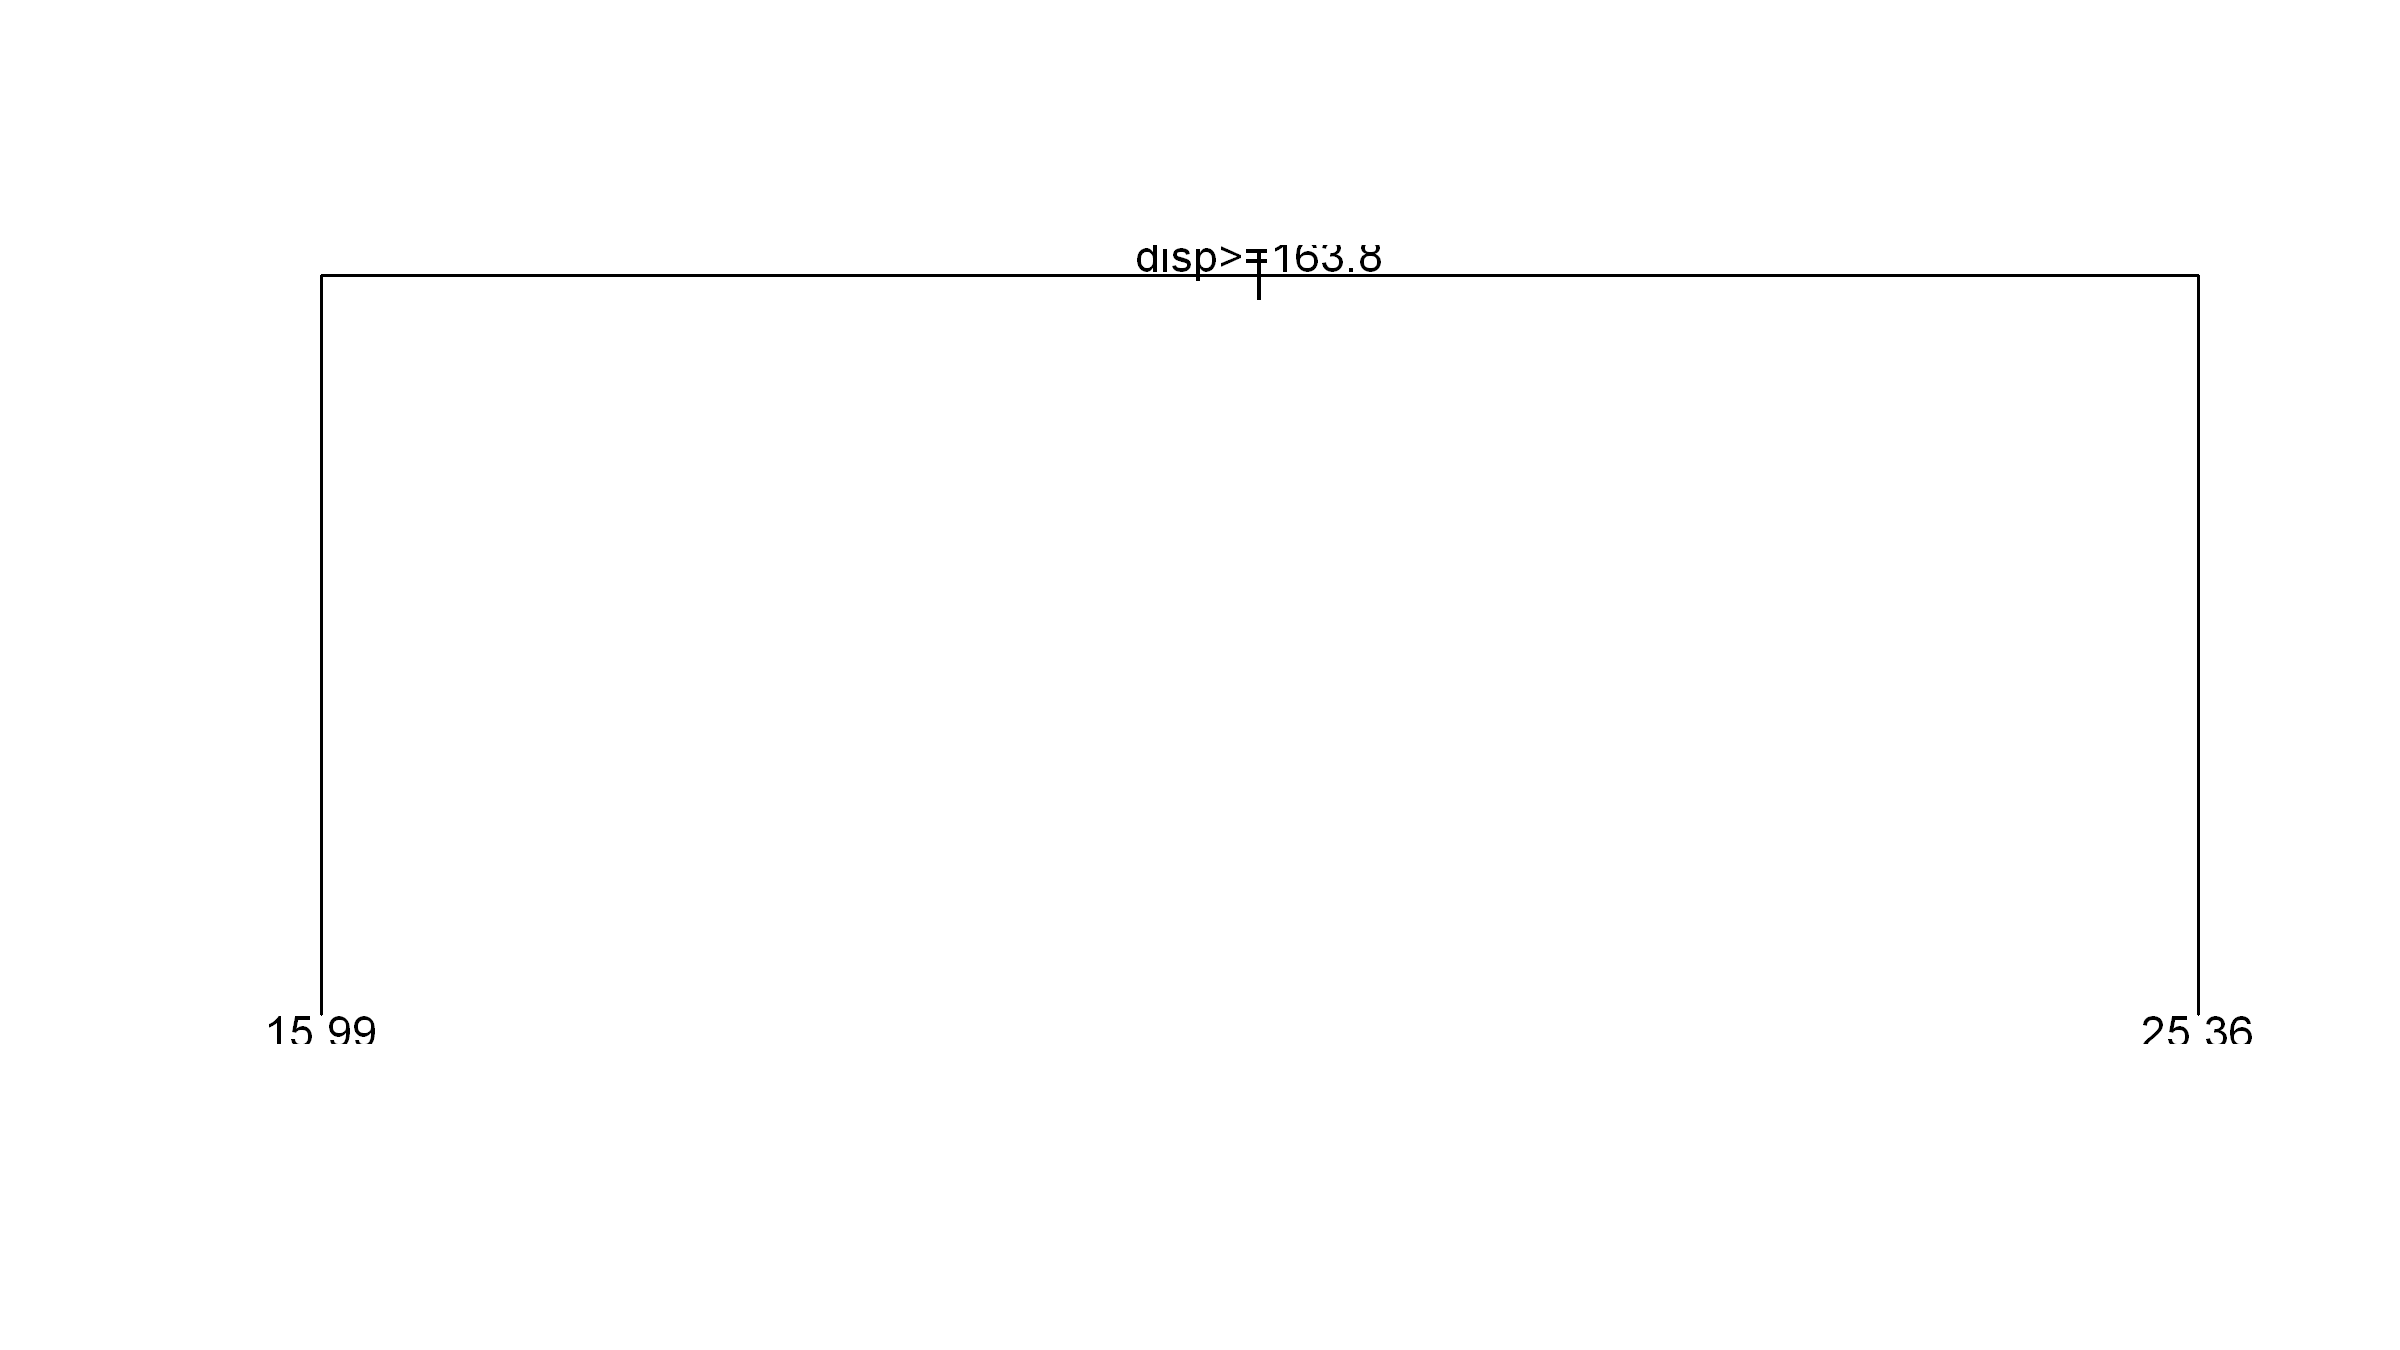

In [22]:
options(repr.plot.width =8 , repr.plot.height = 4.5, repr.plot.res = 300)
plot( fit )
text( fit, cex = .9)

In [21]:
str(as.vector(fit))

List of 14
 $ frame              :'data.frame':	3 obs. of  8 variables:
  ..$ var       : Factor w/ 2 levels "<leaf>","disp": 2 1 1
  ..$ n         : int [1:3] 32 18 14
  ..$ wt        : num [1:3] 32 18 14
  ..$ dev       : num [1:3] 1126 144 292
  ..$ yval      : num [1:3] 20.1 16 25.4
  ..$ complexity: num [1:3] 0.613 0.01 0.01
  ..$ ncompete  : int [1:3] 1 0 0
  ..$ nsurrogate: int [1:3] 1 0 0
 $ where              : Named int [1:32] 3 3 3 2 2 2 2 3 3 2 ...
  ..- attr(*, "names")= chr [1:32] "Mazda RX4" "Mazda RX4 Wag" "Datsun 710" "Hornet 4 Drive" ...
 $ call               : language rpart(formula = mpg ~ hp + disp, data = mtcars)
 $ terms              :Classes 'terms', 'formula'  language mpg ~ hp + disp
  .. ..- attr(*, "variables")= language list(mpg, hp, disp)
  .. ..- attr(*, "factors")= int [1:3, 1:2] 0 1 0 0 0 1
  .. .. ..- attr(*, "dimnames")=List of 2
  .. .. .. ..$ : chr [1:3] "mpg" "hp" "disp"
  .. .. .. ..$ : chr [1:2] "hp" "disp"
  .. ..- attr(*, "term.labels")= chr [1